# Хеш-функции


## Введение

**Определение:** Хеш-функция $h$ - сюръективное отображение из произвольного множества входных данных $X$ в группу остатков от деления на $n$ - $\mathbb{Z}_n = \{0, ..., n-1\}$

$$h: X \longrightarrow \mathbb{Z}_n, \quad n \le |X|$$


**Применения хеш-функций**

- Хеш-таблицы - эффективная структура словаря ключ-значение (самая часто используемая структура данных, за исключением массива)

- В протоколах и криптографии - например хеширование паролей при сохранении в БД или чек-суммы в протоколах передачи данных

- Сравнение объектов - например проверка графов на изоморфизм или быстрое сравнение подстрок

- Источник детерминированного рандома - например если мы хотим распределять сообщения к 5 инстансами микросервиса, чтобы при этом сообщения от одного и того же пользователя попадали на один и тот же инстанс. Для этого мы можем брать хеш от его ip. Это называется консистентное хеширование

- Поиск в многомерных пространствах - детерминированный поиск ближайшей точки среди $m$ точек в $n$-мерном пространстве быстро не решается. Однако можно придумать хеш-функцию, присваивающую лежащим рядом элементам одинаковые хеши, и делать поиск только среди элементов с тем же хешом, что у запроса (local-sensitive hashing)

**Свойства хэш-функций**

- Детерминированность - одни и те же входные данные всегда должны давать одинаковый результат, т.е. $h$ действительно функция

- Вычислимость - $h$ является вычислимой функцией. Еще лучше если она вычисляется быстро (что такое быстро, зависит от задачи). Например, при хешировании строк мы очевидно хотим что-то в духе $O(l)$, где $l$ - длина строки

- Равномерность - значения хеш-функции распределены примерно равномерно относительно входных данных, т.е. $\forall y \in \mathbb{Z}_n \quad \frac{\bigl|\{x \in X : h(x) = y)\}\bigr|}{|X|} \le \frac{c}{n}$, где $c$ - константа. Можно интуитивно переписать это как $P(h(x) = y) \le \frac{c}{n}$, хотя не очень понятно что в этом контексте значит вероятность. Но это удобно

- Лавинность - небольшое изменение входных данных должно приводить к значительному изменению хэш-значения. Формализовать это можно так: представим входы и выходы хеш-функции как последовательности битов, т.е. $X = \{0, 1\}^m$, а $\mathbb{Z}_n = \{0, 1\}^k$. Тогда строгая лавинность - это  $\forall i$ - номер входного бита, $j$ - номер выходного бита $\Longrightarrow$ $\underbrace{\bigl|\{x\colon h_j(x)\oplus h_j(x\oplus e_i)=1\}\bigr|}_{\text{число изменившихся } x} = 2^{m-1}$, где $\oplus$ - операция xor, $e_i$ двоичное число из $0$ с $1$ на $i$-том месте

Это свойства, которыми должны обладать более-менее любые хеш-функции (ну уж первыми двумя точно). С последними двумя есть проблема - обычно доказать их наличие довольно сложно, а зачастую невозможно

**Теорема:**

Пусть $h: X \longrightarrow \mathbb{Z}_n$ - равномерная хеш-функция и мы выбрали $m$ элементов. Тогда вероятность коллизии среди них:

$$P(\text{коллизия}) = 1 - e^{-c \cdot \frac{m(m-1)}{2n}} + O(\frac{m}{n^2})$$

$\square$

Пусть $x_1, ..., x_m$ - выбранные $m$ элементов

$h$ равномерный хеш, так что $P(h(x_i) = h(x_j)) \le \frac{c}{n}$, т.о.

$P(\text{нет коллизий}) \le (1 - \frac{c}{n}) \cdot (1 - \frac{2 \cdot c}{n}) \cdot ... \cdot (1 - \frac{(m-1) \cdot c}{n}) = (e^{-\frac{c}{n}} + O(\frac{1}{n^2})) \cdot (e^{-\frac{2 \cdot c}{n}} + O(\frac{1}{n^2})) \cdot ... \cdot (e^{-\frac{(m - 1) \cdot c}{n}} + O(\frac{1}{n^2})) =$
$= e^{c \cdot \frac{m(m-1)}{n}} + O(\frac{m}{n^2})$, т.о.

$P(\text{коллизия}) = 1 - P(\text{нет коллизий}) = 1 - e^{-c \cdot \frac{m(m-1)}{2n}} + O(\frac{m}{n^2})$

$\blacksquare$

Пусть $c = 1$, $d$ - требуемая вероятность коллизий. Попробуем оценить максимальное кол-во элементов $m$, которые мы можем взять с вероятнотью коллизии $\le d$:

$1 - e^{-\frac{m(m-1)}{2n}} = d$

$m = \frac{1 + \sqrt{1 - 8\ln(1 - d) \cdot n}}{2}$

Например при $n = 1000000$ и $d = 10^{-3}$ : $m = 45$

## Хеши для алгоритмов и структур данных

Эти функции оптимизированы для быстрого вычисления и равномерного распределения значений. Они не обязательно обладают криптографической стойкостью.

### Метод деления

$h : \mathbb{Z} \longrightarrow \mathbb{Z_n}$

$h(k) = k \mod n$

In [1]:
#include <iostream>

int32_t division_hash(int32_t k, int32_t n) {
    return k % n;
}

std::cout << division_hash(21378, 37) << std::endl;

29


При использовании данного метода мы обычно стараемся избегать некоторых значений $n$. 

Например, если $n = 2^p$, то $h(k)$ представляет собой просто $р$ младших битов числа $k$. Если только заранее не известно, что все наборы младших $р$ битов ключей равновероятны, лучше строить хеш-функцию таким образом, чтобы её результат зависел от всех битов ключа.

Зачастую хорошие результаты можно получить, выбирая в качестве значения $n$ простое число, достаточно далекое от степени двойки.

Из формулы очевидно, что $h(k)$ равномерна с коэффициентом $c \approx 1$.

Попробуем примерно оценить лавинность (на int16 и при простых $n$)

In [24]:
import math
import random

def primes_less_than(n):
    if n <= 2:
        return []
    sieve = [True] * n
    sieve[0] = sieve[1] = False
    p = 2
    while p * p < n:
        if sieve[p]:
            for multiple in range(p*p, n, p):
                sieve[multiple] = False
        p += 1
    return [i for i, is_prime in enumerate(sieve) if is_prime]

def division_hash(k, n=997):
    return k % n;

bits = 16
rng = 1 << bits
primes = primes_less_than(rng)
total_avalanche_coeff = 0

iterations = 0
for i in range(len(primes)):
    if random.random() < 0.99:
        continue
    
    iterations += 1
        
    n = primes[i]
    k = math.ceil(math.log2(n))
    
    hash_vals = [division_hash(x, n) for x in range(rng)]
    total_flips = 0
    for i in range(bits):
        mask = 1 << i
        for x in range(rng):
            y1 = hash_vals[x]
            y2 = hash_vals[x ^ mask]
            total_flips += (y1 ^ y2).bit_count()
    
    avg_flips_per = total_flips / (rng * bits)
    avalanche_coeff = avg_flips_per / k
    total_avalanche_coeff += avalanche_coeff

total_avalanche_coeff /= iterations
total_avalanche_coeff

print(f"Коэффициент лавинности = {total_avalanche_coeff:.6f}")

Коэффициент лавинности = 0.151050


Как видно эмпирически, лавинность низкая, что логично исходя из формулы

### Метод умножения

$h : \mathbb{Z} \longrightarrow \mathbb{Z_n}$


$h(k) = \lfloor n \cdot (k \cdot A \mod 1) \rfloor$

где $A$ - константа, обычно выбираемая как $A = \frac{\sqrt{5}-1}{2} \approx 0.618$.

In [34]:
#include <iostream>
#include <cmath>

int32_t multiplication_hash(const int32_t k, const int32_t n, const double a = (sqrt(5) - 1) / 2) {
    const double tmp = k * a;
    return floor(n * (tmp - floor(tmp)));
}

Преимущество метода умножения заключается в том, что значение $n$ перестает быть критичным и мы можем выбирать его исходя из нужд задачи.

Попробуем примерно оценить равномерность (на int16 и при $A = \frac{\sqrt{5}-1}{2}$)

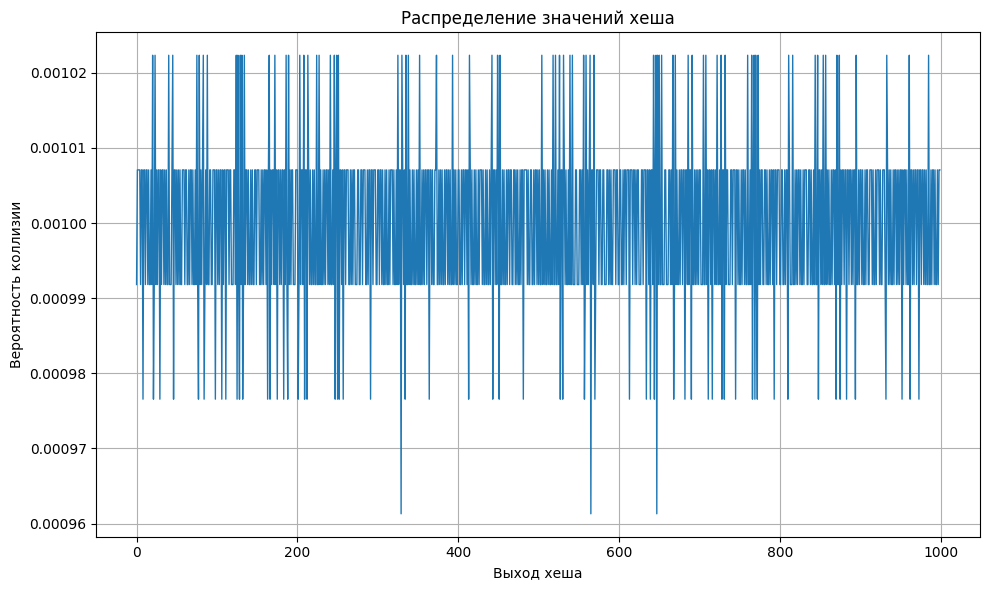

Максимальная вероятность коллизии = 0.001022 при n = 1000


In [2]:
import math
import matplotlib.pyplot as plt

def multiplication_hash(k, n, a = (math.sqrt(5) - 1) / 2):
    return int(n * ((k * a) % 1))

dom_rng = 2**16
val_rng = 1000
counts = [0] * val_rng

for x in range(dom_rng):
    y = multiplication_hash(x, val_rng)
    counts[y] += 1

fractions = [cnt / dom_rng for cnt in counts]


plt.figure(figsize=(10, 6))
plt.plot(range(val_rng), fractions, lw=1)
plt.xlabel('Выход хеша')
plt.ylabel('Вероятность коллизии')
plt.title('Распределение значений хеша')
plt.grid(True)
plt.tight_layout()
plt.show()


max_frac = max(fractions)
max_y    = fractions.index(max_frac)
print(f"Максимальная вероятность коллизии = {max_frac:.6f} при n = {val_rng}")

Как видно эмпирически, хеш равномеренс с $c \approx 1$

Теперь исследуем лавинность

In [3]:
import math
import random

bits = 16
rng = 1 << bits
numbers = range(2, rng)
total_avalanche_coeff = 0

iterations = 0
for i in range(len(numbers)):
    if random.random() < 0.999:
        continue
    
    iterations += 1
        
    n = numbers[i]
    k = math.ceil(math.log2(n))
    
    hash_vals = [multiplication_hash(x, n) for x in range(rng)]
    total_flips = 0
    for i in range(bits):
        mask = 1 << i
        for x in range(rng):
            y1 = hash_vals[x]
            y2 = hash_vals[x ^ mask]
            total_flips += (y1 ^ y2).bit_count()
    
    avg_flips_per = total_flips / (rng * bits)
    avalanche_coeff = avg_flips_per / k
    total_avalanche_coeff += avalanche_coeff

total_avalanche_coeff /= iterations
total_avalanche_coeff

print(f"Коэффициент лавинности = {total_avalanche_coeff:.6f}")

Коэффициент лавинности = 0.492536


Еще одно преимущество этого хеша - практически идеальная лавинность.

Единственный минус, который теперь бросается в глаза - низкая скорость. Действительно, операции с числами с плавающей точкой занимают сильно больше времени, чем с обычными интами.

Попробуем избавиться от этого недостатка, для этого ограничим значения $m = 2^p$ степенями двойки. Затем ограничим возможные значения $A = \frac{s}{2^w}$ дробями такого вида, где $w$ - длина машинного слова.

Хеш будем считать так:
1. Посчитаем $k * A * 2^w$ - $2w$-битовое число
2. Представим его как $r_1 * 2^w + r_0$ - конкатенация двух $w$-битовых чисел
3. Хешом будут старшие $p$ бит числа $r_0$



In [ ]:
uint64_t multiplication_hash(const uint64_t k, const uint32_t p, const uint64_t s = 0x9E3779B97F4A7C16) {
    return k * s >> (64 - p);
}

### Универсальное хеширование

Если недоброжелатель будет умышленно выбирать ключи для хеширования с использованием конкретной хеш-функции, то он сможет подобрать $n$ значений, которые будут хешироваться в одну и ту же ячейку таблицы, приводя к среднему времени выборки О(п). Таким образом, любая фиксированная хеш-функция ста- новится уязвимой, и единственный эффективный выход из ситуации - случайный выбор хеш-функции, не зависящий от того, с какими именно ключами ей предсто- ит работать. Такой подход, который называется универсальным хешированием, гарантирует хорошую производительность в среднем, независимо от того, какие данные будут выбраны упомянутым недоброжелателем.

Главная идея универсального хеширования состоит в случайном выборе хеш- функции из некоторого тщательно отобранного класса функций в начале работы программы. Как и в случае быстрой сортировки, рандомизация гарантирует, что
одни и те же входные данные не могут постоянно давать наихудшее поведение алгоритма. В силу рандомизации алгоритм будет работать всякий раз по-разному, даже для одних и тех же входных данных, что гарантирует высокую среднюю производительность для любых входных данных. Возвращаясь к примеру с таб-
лицей символов компилятора, мы обнаружим, что никакой выбор программистом имен идентификаторов не может привести к постоянно низкой производительно-
сти хеширования. 

Такое снижение возможно только тогда, когда компилятором выбрана случайная хеш-функция, которая приводит к плохому хешированию кон- кретных входных данных; однако вероятность такой ситуации очень мала и оди- накова для любого множества идентификаторов одного и то же размера.


Параметризуемость - целое семейство хеш-функций с конфигурируемыми параметрами : $\forall x, y \in Z_n$ $P(h_{\alpha}(x) = y) \le \frac{c}{n}$, где $c$ - константа и вероятность считается по случайному выбору параметров хеш функции и события $h_{\alpha}(w) = x$ независимы в совокупности.

Рассмотрим пример универсального семейства хеш-функций

$h_{a,b}(k) = ((a \cdot k + b) \mod p) \mod m$

где $p$ - простое число, большее максимального значения ключа, $a$ и $b$ - случайные числа, $1 \leq a < p$ и $0 \leq b < p$.

In [9]:
M = 100
a = 123
b = 321
p = 1e9+7

def universal_hash(x):
    return ((a * x + b) % p) % M

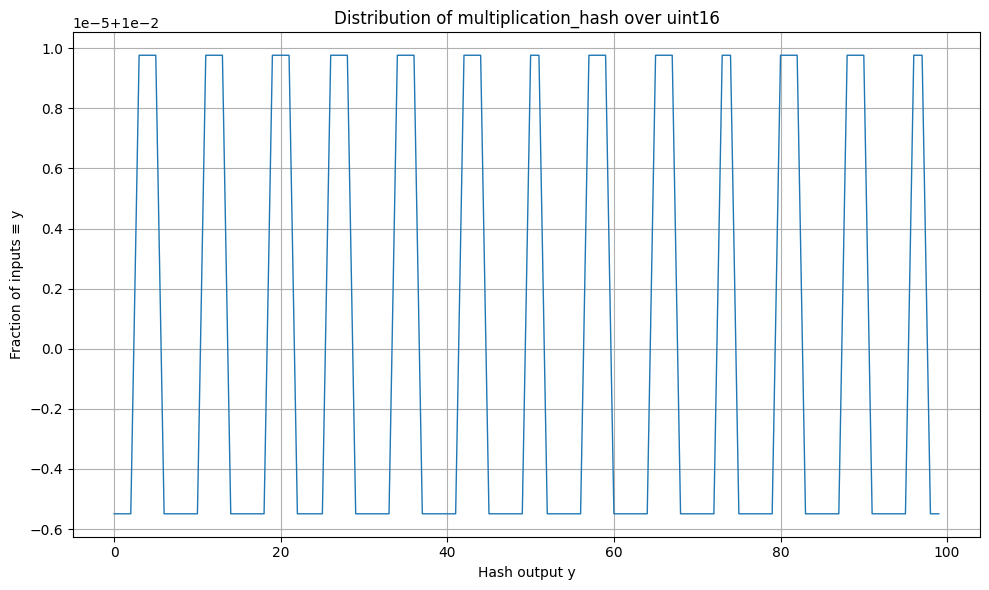

Max fraction = 0.010010 at y = 3


In [4]:
import math
import matplotlib.pyplot as plt

M = 100
a = 123
b = 321
p = 10**9 + 7
def universal_hash(x):
    return ((a * x + b) % p) % M


N = 2**16
counts = [0] * M

for x in range(N):
    y = universal_hash(x)
    counts[y] += 1

fractions = [cnt / N for cnt in counts]


plt.figure(figsize=(10, 6))
plt.plot(range(M), fractions, lw=1)
plt.xlabel('Hash output y')
plt.ylabel('Fraction of inputs ≡ y')
plt.title('Distribution of multiplication_hash over uint16')
plt.grid(True)
plt.tight_layout()
plt.show()


max_frac = max(fractions)
max_y    = fractions.index(max_frac)
print(f"Max fraction = {max_frac:.6f} at y = {max_y}")

In [5]:
import math

M = 100
A = (math.sqrt(5) - 1) / 2
N = 1 << 16  # 65536
m = 16
k = math.ceil(math.log2(M))  # ceil(log2 100) = 7

hash_vals = [universal_hash(x) for x in range(N)]

# Compute total bit flips
total_flips = 0
for i in range(m):
    mask = 1 << i
    for x in range(N):
        y1 = hash_vals[x]
        y2 = hash_vals[x ^ mask]
        total_flips += (y1 ^ y2).bit_count()
        
# Compute average flips per input bit flip
avg_flips_per = total_flips / (N * m)
# Avalanche coefficient (fraction of output bits changed)
avalanche_coeff = avg_flips_per / k

total_flips, avg_flips_per, avalanche_coeff

(2658292, 2.535144805908203, 0.3621635437011719)

## Криптографические хеш-функции

Криптографические хеш-функции должны удовлетворять более строгим требованиям безопасности:

- Необратимость - решение уравнения $h(x) = y$ относительно $x$ за $\Omega(|X|)$. На практике часто достаточно $\Omega(\sqrt{|X|})$

- Устойчивость к коллизиям - решение уравнения $h(x_1) = h(x_2)$ относительно $x_2$ за $\Omega(|X|)$

- 

Опять же, эти свойства сложно доказать для реальных хеш-функций

**ToyHash**



In [1]:
#include <cstdint>
#include <vector>
#include <string>
#include <iostream>
#include <iomanip>

// Циклический сдвиг влево на n бит по модулю 32 бита
static uint32_t rol(const uint32_t x, const int32_t n) {
    return (x << n) | (x >> (32 - n));
}

// ToyHash: простая демонстрационная хеш-функция
uint32_t toy_hash(const std::vector<uint8_t>& input) {
    const uint32_t IV = 0x01234567;
    const uint32_t C  = 0x9E3779B1;
    const size_t   BLOCK_SIZE = 4;

    // Подготовка данных с паддингом
    std::vector<uint8_t> data = input;
    // Добавляем 0x80
    data.push_back(0x80);
    // Добиваем нулями до кратности 4 байтам
    while (data.size() % BLOCK_SIZE != 0) {
        data.push_back(0x00);
    }

    uint32_t h = IV;
    // Обработка каждого 4-байтового блока
    for (size_t i = 0; i < data.size(); i += BLOCK_SIZE) {
        uint32_t M = (uint32_t(data[i])   << 24) |
                     (uint32_t(data[i+1]) << 16) |
                     (uint32_t(data[i+2]) <<  8) |
                     (uint32_t(data[i+3])      );
        uint32_t T = (h ^ M) + C;
        h = rol(T, 5);
    }

    return h;
}


std::string message;
std::cin >> message;

std::vector<uint8_t> bytes(message.begin(), message.end());
uint32_t hash = toy_hash(bytes);

std::cout << "ToyHash(\"" << message << "\") = 0x" << std::hex << std::uppercase << std::setw(8) << std::setfill('0') << hash << std::dec << std::endl;

 krenle


ToyHash("krenle") = 0x75C61E43


## Специализированные хеш-функции

Важно помнить, что хеш-функция - это просто отображение из множества объектов, с которыми мы работаем в набор целых чисел. Мы вольны сами задавать список свойств, которыми будет обладать это отображение.

Таким образом появляются хеши для графов, которые дают изоморфным графам одинаковые значения, хеши для деревьев, хеши для шахматных позиций, полиномиальные хеши для строк (которые легко пересчитываются от подстроки), local-sensitive хеши для точек в $n$-мерном пространстве и так далее и так далее.

Некоторые из этих более специальных хешей будут рассмотрены в следующих ноутбуках